## Wine Quality Predictor

This project uses a neural network to predict wine quality based on several explanatory variables outlined below.  
Data visualization and ANOVA were used to determine which variables to omit, and which to include. 

#### Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../red-wine-dataset/wineQualityReds.csv')
pd.set_option('display.max_rows', None)

In [3]:
df = df.drop(df.columns[0], 1)

In [4]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Reconfiguring the 'quality' category for more accurate prediction  
_Reviews_ = 0 if 3 <= _quality_ <= 4  
_Reviews_ = 1 if 5 <= _quality_ <= 6  
_Reviews_ = 2 if 7 <= _quality_ <= 8

In [5]:
import seaborn as sns

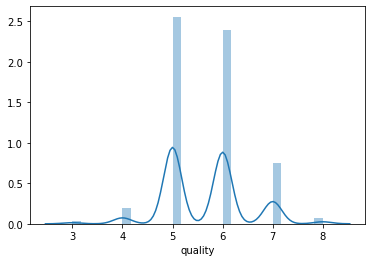

In [6]:
sns.distplot(df['quality'])

In [7]:
reviews = []
for i in df['quality']:
    if i >= 3 and i <= 4:
        reviews.append(1)
    elif i >= 5 and i <= 6:
        reviews.append(2)
    elif i >= 7:
        reviews.append(3)
df['Reviews'] = reviews

#### Visualizing the outcome variable

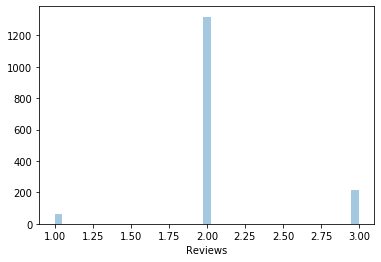

In [8]:
sns.distplot(df['Reviews'], kde=False)

#### Visualizing and running preliminary tests on outcome variables to determine what to include in the model

In [9]:
import scipy.stats as stats

This function splits the given variable's values according to the categories of Reviews into three arrays, then performs a one-way ANOVA on them

In [10]:
def get_split_anova(varname):
    arr1=[]
    arr2=[]
    arr3=[]
    for i in range(len(df[varname])):
        if df['Reviews'][i] == 1:
            arr1.append(df[varname][i])
        elif df['Reviews'][i] == 2:
            arr2.append(df[varname][i])
        elif df['Reviews'][i] == 3:
            arr3.append(df[varname][i])
    return stats.f_oneway(arr1, arr2, arr3)

##### Alcohol

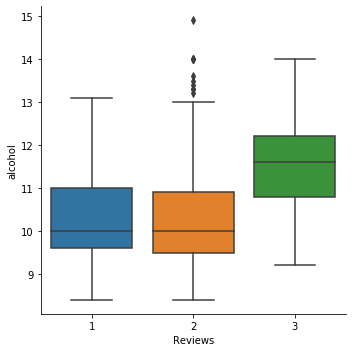

In [11]:
sns.catplot(x="Reviews", y="alcohol", kind="box", data=df)

In [12]:
get_split_anova("alcohol")

F_onewayResult(statistic=158.77759051145458, pvalue=1.2916161190447622e-63)

##### Citric Acid

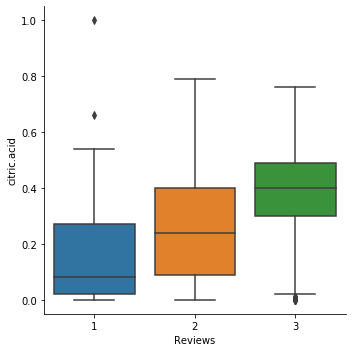

In [13]:
sns.catplot(x="Reviews", y="citric.acid", kind="box", data=df)

In [14]:
get_split_anova("citric.acid")

F_onewayResult(statistic=44.84055093298384, pvalue=1.1309939791709047e-19)

##### Fixed Acidity

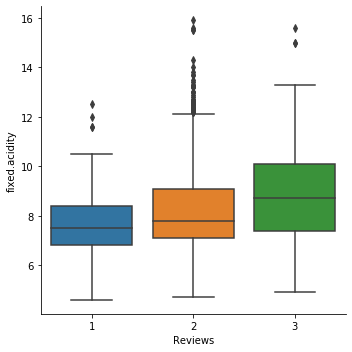

In [15]:
sns.catplot(x="Reviews", y="fixed.acidity", kind="box", data=df)

In [16]:
get_split_anova("fixed.acidity")

F_onewayResult(statistic=13.168538421422843, pvalue=2.1264300676738575e-06)

##### Volatile Acidity

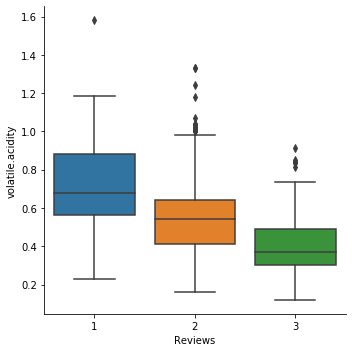

In [17]:
sns.catplot(x="Reviews", y="volatile.acidity", kind="box", data=df)

In [18]:
get_split_anova("volatile.acidity")

F_onewayResult(statistic=102.40396599045721, pvalue=1.436357968294605e-42)

##### Residual Sugar

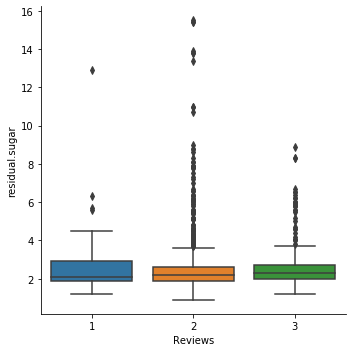

In [19]:
sns.catplot(x="Reviews", y="residual.sugar", kind="box", data=df)

In [20]:
get_split_anova("residual.sugar")

F_onewayResult(statistic=2.3235803242594573, pvalue=0.09825353703123613)

##### Chlorides

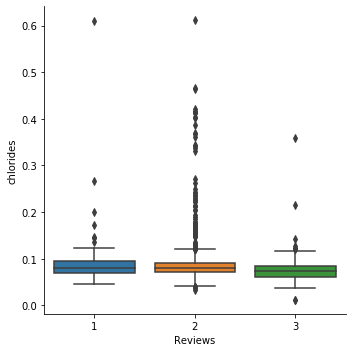

In [21]:
sns.catplot(x="Reviews", y="chlorides", kind="box", data=df)

In [22]:
get_split_anova("chlorides")

F_onewayResult(statistic=8.259666390743718, pvalue=0.0002699663035816813)

##### Free Sulfur Dioxide

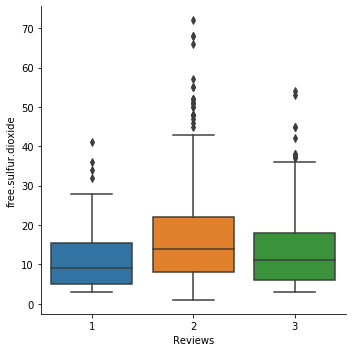

In [23]:
sns.catplot(x="Reviews", y="free.sulfur.dioxide", kind="box", data=df)

In [24]:
get_split_anova("free.sulfur.dioxide")

F_onewayResult(statistic=9.300890592482181, pvalue=9.639020248327718e-05)

##### Total Sulfur Dioxide

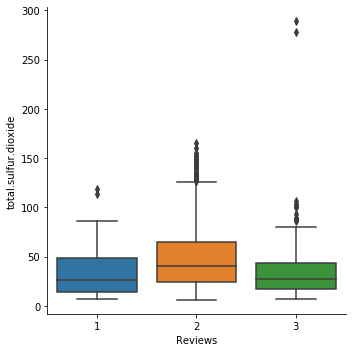

In [25]:
sns.catplot(x="Reviews", y="total.sulfur.dioxide", kind="box", data=df)

In [26]:
get_split_anova("total.sulfur.dioxide")

F_onewayResult(statistic=21.95699739497124, pvalue=3.91767412687428e-10)

##### Density

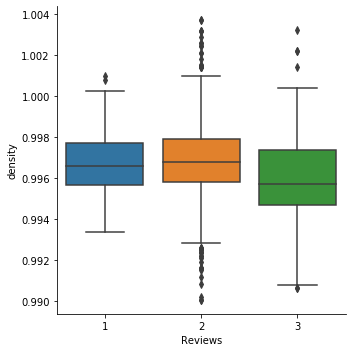

In [27]:
sns.catplot(x="Reviews", y="density", kind="box", data=df)

In [28]:
get_split_anova("density")

F_onewayResult(statistic=18.76516704694085, pvalue=8.805121986213431e-09)

##### pH

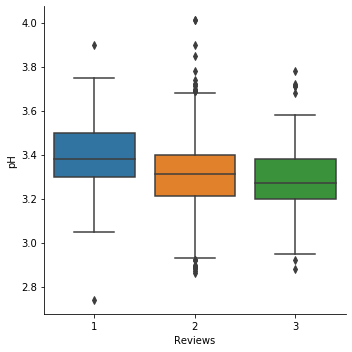

In [29]:
sns.catplot(x="Reviews", y="pH", kind="box", data=df)

In [30]:
get_split_anova("pH")

F_onewayResult(statistic=9.410305769860614, pvalue=8.65097637054731e-05)

##### Sulphates

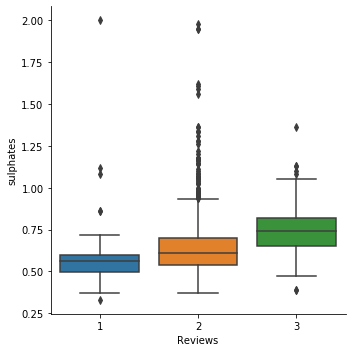

In [31]:
sns.catplot(x="Reviews", y="sulphates", kind="box", data=df)

In [32]:
get_split_anova("sulphates")

F_onewayResult(statistic=36.51997485253014, pvalue=3.103071132575916e-16)

#### Examining correlations between variables to keep only the most relevant variables

In [33]:
corr = df.corr()
corr

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Reviews
fixed.acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.125886
volatile.acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.333816
citric.acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.228930
residual.sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.030153
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.098829
free.sulfur.dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.025075
total.sulfur.dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.081960
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.123566
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.093946
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.205409


#### Plotting the variables with the highest correlations between them

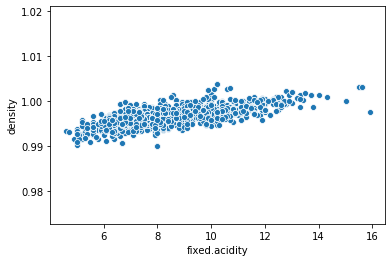

In [34]:
sns.scatterplot(x='fixed.acidity', y='density', data=df)

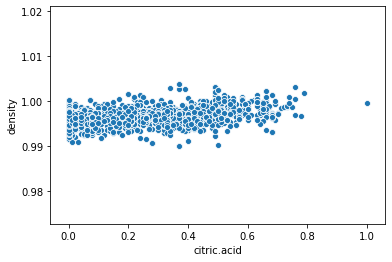

In [35]:
sns.scatterplot(x='citric.acid', y='density', data=df)

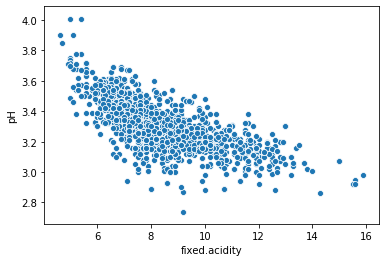

In [36]:
sns.scatterplot(x='fixed.acidity', y='pH', data=df)

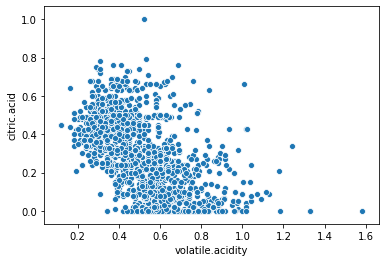

In [37]:
sns.scatterplot(x='volatile.acidity', y='citric.acid', data=df)

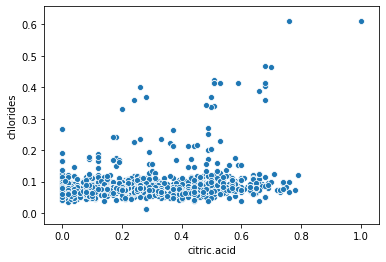

In [38]:
sns.scatterplot(x='citric.acid', y='chlorides', data=df)

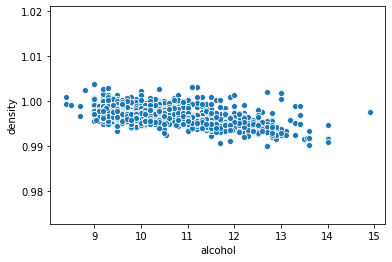

In [39]:
sns.scatterplot(x='alcohol', y='density', data=df)

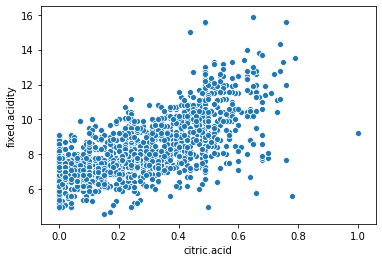

In [40]:
sns.scatterplot(x='citric.acid', y='fixed.acidity', data=df)

#### Creating the neural network

We have found that residual sugar is not significant at the 5% level in our one-way ANOVA (using 'Review' as the explanatory variable), and the similar spread across outcome category is also observed in the boxplot.  
We also exclude fixed acidity from the model due to high correlation with citric acid, density and pH, making it redundant.  
Lastly, we remove chlorides, since the spread across outcome categories is quite similar and therefore seems to have little predictive power.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [42]:
X, y = np.array(df[df.columns.difference(['Reviews', 'quality', 'fixed.acidity', 
                                          'residual.sugar', 'chlorides', 'citric.acid'])]), np.array(df['Reviews'])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [44]:
nn = MLPClassifier(activation='tanh', solver='adam', verbose=True)
nn.fit(X_train, y_train)

Iteration 1, loss = 0.87347938
Iteration 2, loss = 0.56585196
Iteration 3, loss = 0.56428812
Iteration 4, loss = 0.55563770
Iteration 5, loss = 0.52763020
Iteration 6, loss = 0.51621975
Iteration 7, loss = 0.51458534
Iteration 8, loss = 0.50765086
Iteration 9, loss = 0.50333666
Iteration 10, loss = 0.50132073
Iteration 11, loss = 0.49893099
Iteration 12, loss = 0.49823807
Iteration 13, loss = 0.49582390
Iteration 14, loss = 0.49460746
Iteration 15, loss = 0.49304686
Iteration 16, loss = 0.49249367
Iteration 17, loss = 0.49094793
Iteration 18, loss = 0.48987269
Iteration 19, loss = 0.48776235
Iteration 20, loss = 0.48668637
Iteration 21, loss = 0.48554692
Iteration 22, loss = 0.48385483
Iteration 23, loss = 0.48196146
Iteration 24, loss = 0.48197286
Iteration 25, loss = 0.47892044
Iteration 26, loss = 0.47785361
Iteration 27, loss = 0.47664595
Iteration 28, loss = 0.47594934
Iteration 29, loss = 0.47467026
Iteration 30, loss = 0.47287965
Iteration 31, loss = 0.47164188
Iteration 32, los

/mnt/c/Users/Ayesha Naeem Syeda/Desktop/Project/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [45]:
accuracy_score(y_test, nn.predict(X_test))

0.8275